<a href="https://colab.research.google.com/github/AhmadAlabrash/Deep-Learning/blob/main/ann%26%26cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [ ]:
X_train[1]


array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train=y_train.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plt_see(i):
 plt.imshow(X_train[i])
 plt.xlabel(classes[y_train[i]])

In [ ]:
from sys import platform
platform

'linux'

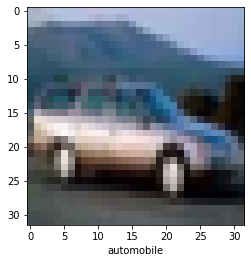

In [ ]:
plt_see(4)

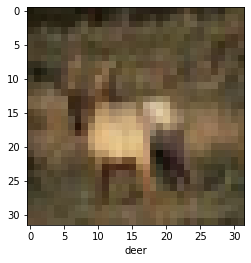

In [ ]:
plt_see(3)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 124s 79ms/step - loss: 1.8079 - accuracy: 0.3558
Epoch 2/5
1563/1563 [==============================] - 124s 79ms/step - loss: 1.6225 - accuracy: 0.4263
Epoch 3/5
1563/1563 [==============================] - 126s 81ms/step - loss: 1.5399 - accuracy: 0.4599
Epoch 4/5
1563/1563 [==============================] - 123s 79ms/step - loss: 1.4790 - accuracy: 0.4786
Epoch 5/5
1563/1563 [==============================] - 121s 77ms/step - loss: 1.4286 - accuracy: 0.4966


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
ann.evaluate(X_test,y_test)

313/313 [==============================] - 10s 31ms/step - loss: 1.4929 - accuracy: 0.4669


[1.4928940534591675, 0.4668999910354614]

In [ ]:
pr =ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in pr]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))



Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.48      0.55      1000
           1       0.58      0.62      0.60      1000
           2       0.47      0.19      0.27      1000
           3       0.48      0.13      0.20      1000
           4       0.29      0.69      0.40      1000
           5       0.47      0.29      0.36      1000
           6       0.57      0.40      0.47      1000
           7       0.48      0.59      0.53      1000
           8       0.63      0.59      0.61      1000
           9       0.43      0.70      0.53      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.45     10000
weighted avg       0.50      0.47      0.45     10000



In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.4521 - accuracy: 0.4779
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.0922 - accuracy: 0.6190
Epoch 3/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.9537 - accuracy: 0.6690
Epoch 4/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8575 - accuracy: 0.7019
Epoch 5/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7816 - accuracy: 0.7286
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7184 - accuracy: 0.7487
Epoch 7/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.6627 - accuracy: 0.7701
Epoch 8/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.6079 - accuracy: 0.7867
Epoch 9/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.5606 - accuracy: 0.8050
Epoch 10/10
1563/1563 [==============================] - 70s 45m

In [ ]:
pp=cnn.predict(X_test)
y_classes = [np.argmax(element) for element in pp]



In [ ]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.80      0.74      1000
           1       0.80      0.82      0.81      1000
           2       0.55      0.64      0.59      1000
           3       0.49      0.50      0.50      1000
           4       0.70      0.62      0.66      1000
           5       0.68      0.48      0.56      1000
           6       0.76      0.78      0.77      1000
           7       0.72      0.78      0.75      1000
           8       0.85      0.77      0.81      1000
           9       0.77      0.79      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



In [ ]:
y_classes[1]


8

In [ ]:
y_test[1]

array([8], dtype=uint8)

In [ ]:
y_classes[8]


3

In [ ]:
y_test[8]

array([3], dtype=uint8)